# **Sentimental Analysis on Amazon mobile phone reviews**

Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

Loading the dataset

In [2]:
df = pd.read_csv("/kaggle/input/amazon-mobile-phone-reviews/amazon_unlocked_mobile.csv")
print(df.shape)


(413840, 6)


Features of dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413840 entries, 0 to 413839
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   product_name  413840 non-null  object 
 1   brand_name    348669 non-null  object 
 2   price         407907 non-null  float64
 3   rating        413840 non-null  int64  
 4   reviews       413770 non-null  object 
 5   review_votes  401544 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 18.9+ MB


In [4]:
df.columns

Index(['product_name', 'brand_name', 'price', 'rating', 'reviews',
       'review_votes'],
      dtype='object')

In [5]:
df.isnull().sum()

product_name        0
brand_name      65171
price            5933
rating              0
reviews            70
review_votes    12296
dtype: int64

Removing null values from dataset

In [6]:
df=df.dropna(axis=0)

In [7]:
df.isnull().sum()

product_name    0
brand_name      0
price           0
rating          0
reviews         0
review_votes    0
dtype: int64

In [8]:
df.head()

,product_name,brand_name,price,rating,reviews,review_votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


Plotting on graph the top 3 mobile brands present in the dataset

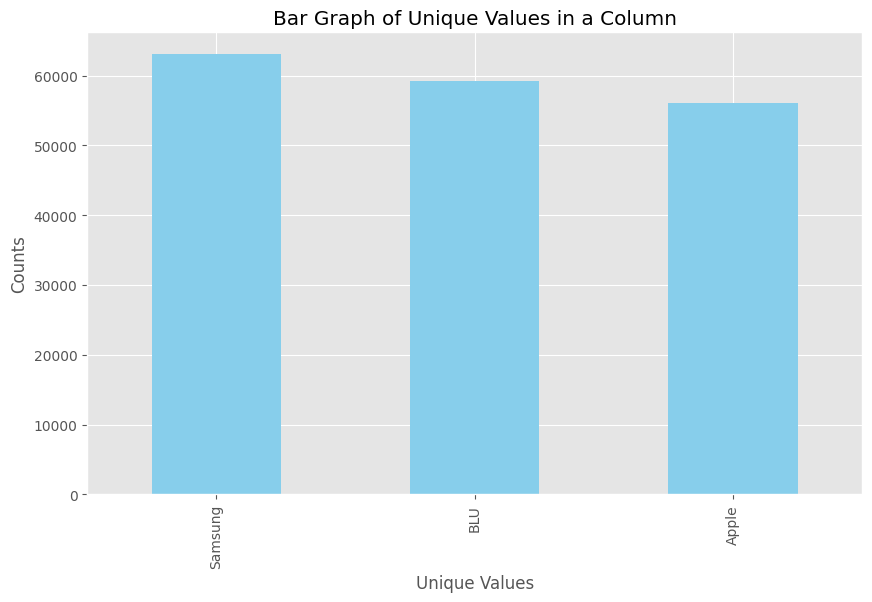

In [9]:
value_counts = df['brand_name'].value_counts()
top_values = value_counts.head(3)
plt.figure(figsize=(10, 6)) 
top_values.plot(kind='bar', color='skyblue')
plt.xlabel('Unique Values')
plt.ylabel('Counts')
plt.title('Bar Graph of Unique Values in a Column')

plt.show()


Dividing the dataset into 3 parts, df1:brand name-Samsung; df2:brand name-BLU; df3:brand name-Apple

In [10]:
df1=df[df['brand_name'] == 'Samsung']

In [11]:
print(df1.shape)

(63035, 6)


In [12]:
df2=df[df['brand_name'] == 'BLU']

In [13]:
print(df2.shape)

(59168, 6)


In [14]:
df3=df[df['brand_name'] == 'Apple']

In [15]:
print(df3.shape)

(56101, 6)


Analysis on Samsung mobile reviews

In [17]:
df1.insert(0, 'id', range(1, len(df1) + 1))
df1 = df1.head(500)
print(df1.shape)

(500, 7)


In [18]:
df1.head()

,id,product_name,brand_name,price,rating,reviews,review_votes
0,1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,5,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


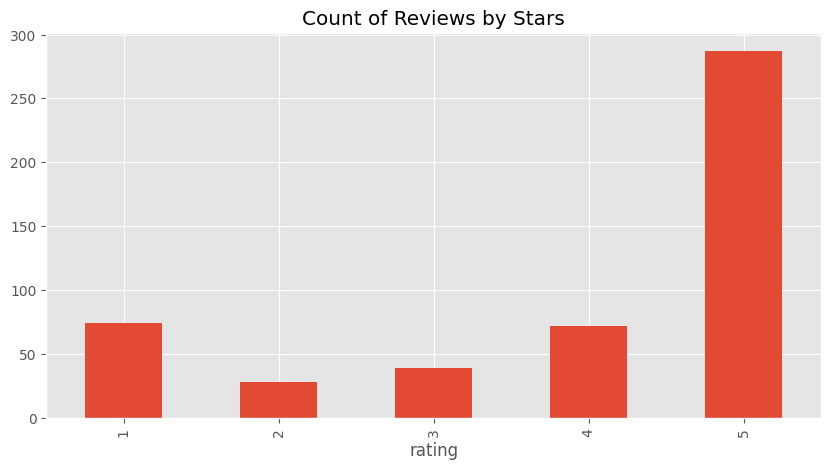

In [19]:
ax = df1['rating'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('rating')
plt.show()

In [20]:
example = df1['reviews'][10]
print(example)

My fiance had this phone previously, but caused many problems. So, of course, we decided to browse amazon for a replacement til' our contract is up! & so far so good!


In [21]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['My',
 'fiance',
 'had',
 'this',
 'phone',
 'previously',
 ',',
 'but',
 'caused',
 'many']

In [22]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('My', 'PRP$'),
 ('fiance', 'NN'),
 ('had', 'VBD'),
 ('this', 'DT'),
 ('phone', 'NN'),
 ('previously', 'RB'),
 (',', ','),
 ('but', 'CC'),
 ('caused', 'VBD'),
 ('many', 'JJ')]

In [23]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  My/PRP$
  fiance/NN
  had/VBD
  this/DT
  phone/NN
  previously/RB
  ,/,
  but/CC
  caused/VBD
  many/JJ
  problems/NNS
  ./.
  So/RB
  ,/,
  of/IN
  course/NN
  ,/,
  we/PRP
  decided/VBD
  to/TO
  browse/VB
  amazon/NN
  for/IN
  a/DT
  replacement/NN
  til/NN
  '/''
  our/PRP$
  contract/NN
  is/VBZ
  up/RP
  !/.
  &/CC
  so/RB
  far/RB
  so/RB
  good/JJ
  !/.)


Model 1: Vader Sentiment Scoring

In [24]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [25]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [26]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [27]:
sia.polarity_scores(example)

{'neg': 0.094, 'neu': 0.688, 'pos': 0.218, 'compound': 0.6898}

In [28]:
res = {}
for i, row in tqdm(df1.iterrows(), total=len(df1)):
    text = row['reviews']
    myid = row['id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [29]:
vaders1 = pd.DataFrame(res).T
vaders1 = vaders1.reset_index().rename(columns={'index': 'id'})
vaders1 = vaders1.merge(df1, how='left')

In [30]:
vaders1.to_csv('updated_dataset.csv', index=False)

In [31]:
vaders1.head()

,id,neg,neu,pos,compound,product_name,brand_name,price,rating,reviews,review_votes
0,1,0.015,0.796,0.189,0.8783,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,2,0.072,0.597,0.331,0.9231,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,3,0.000,0.238,0.762,0.4927,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,4,0.000,0.500,0.500,0.9185,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,5,0.038,0.897,0.065,0.2942,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


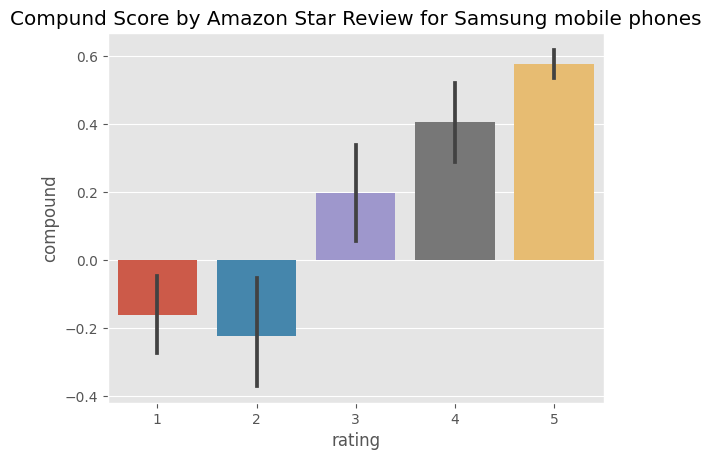

In [85]:
ax = sns.barplot(data=vaders1, x='rating', y='compound')
ax.set_title('Compund Score by Amazon Star Review for Samsung mobile phones')
plt.show()

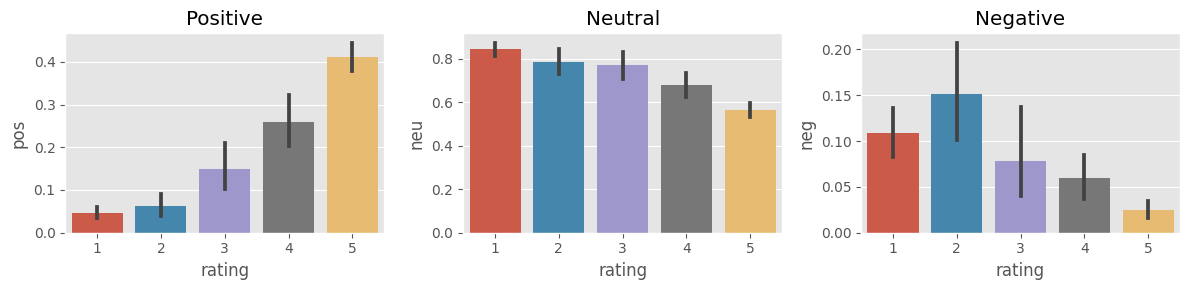

In [33]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders1, x='rating', y='pos', ax=axs[0])
sns.barplot(data=vaders1, x='rating', y='neu', ax=axs[1])
sns.barplot(data=vaders1, x='rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

Roberta Model

In [39]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [40]:
print(example)
sia.polarity_scores(example)

My fiance had this phone previously, but caused many problems. So, of course, we decided to browse amazon for a replacement til' our contract is up! & so far so good!


{'neg': 0.094, 'neu': 0.688, 'pos': 0.218, 'compound': 0.6898}

In [41]:
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.1140884, 'roberta_neu': 0.24666633, 'roberta_pos': 0.6392453}


In [42]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [43]:
res = {}
for i, row in tqdm(df1.iterrows(), total=len(df1)):
    try:
        text = row['reviews']
        myid = row['id']
        vader_result1 = sia.polarity_scores(text)
        vader_result1_rename = {}
        for key, value in vader_result1.items():
            vader_result1_rename[f"vader_{key}"] = value
        roberta_result1 = polarity_scores_roberta(text)
        both = {**vader_result1_rename, **roberta_result1}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/500 [00:00<?, ?it/s]

In [44]:
results_df1 = pd.DataFrame(res).T
results_df1 = results_df1.reset_index().rename(columns={'index': 'id'})
results_df1 = results_df1.merge(df1, how='left')

In [45]:
results_df1.columns

Index(['id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'product_name',
       'brand_name', 'price', 'rating', 'reviews', 'review_votes'],
      dtype='object')

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


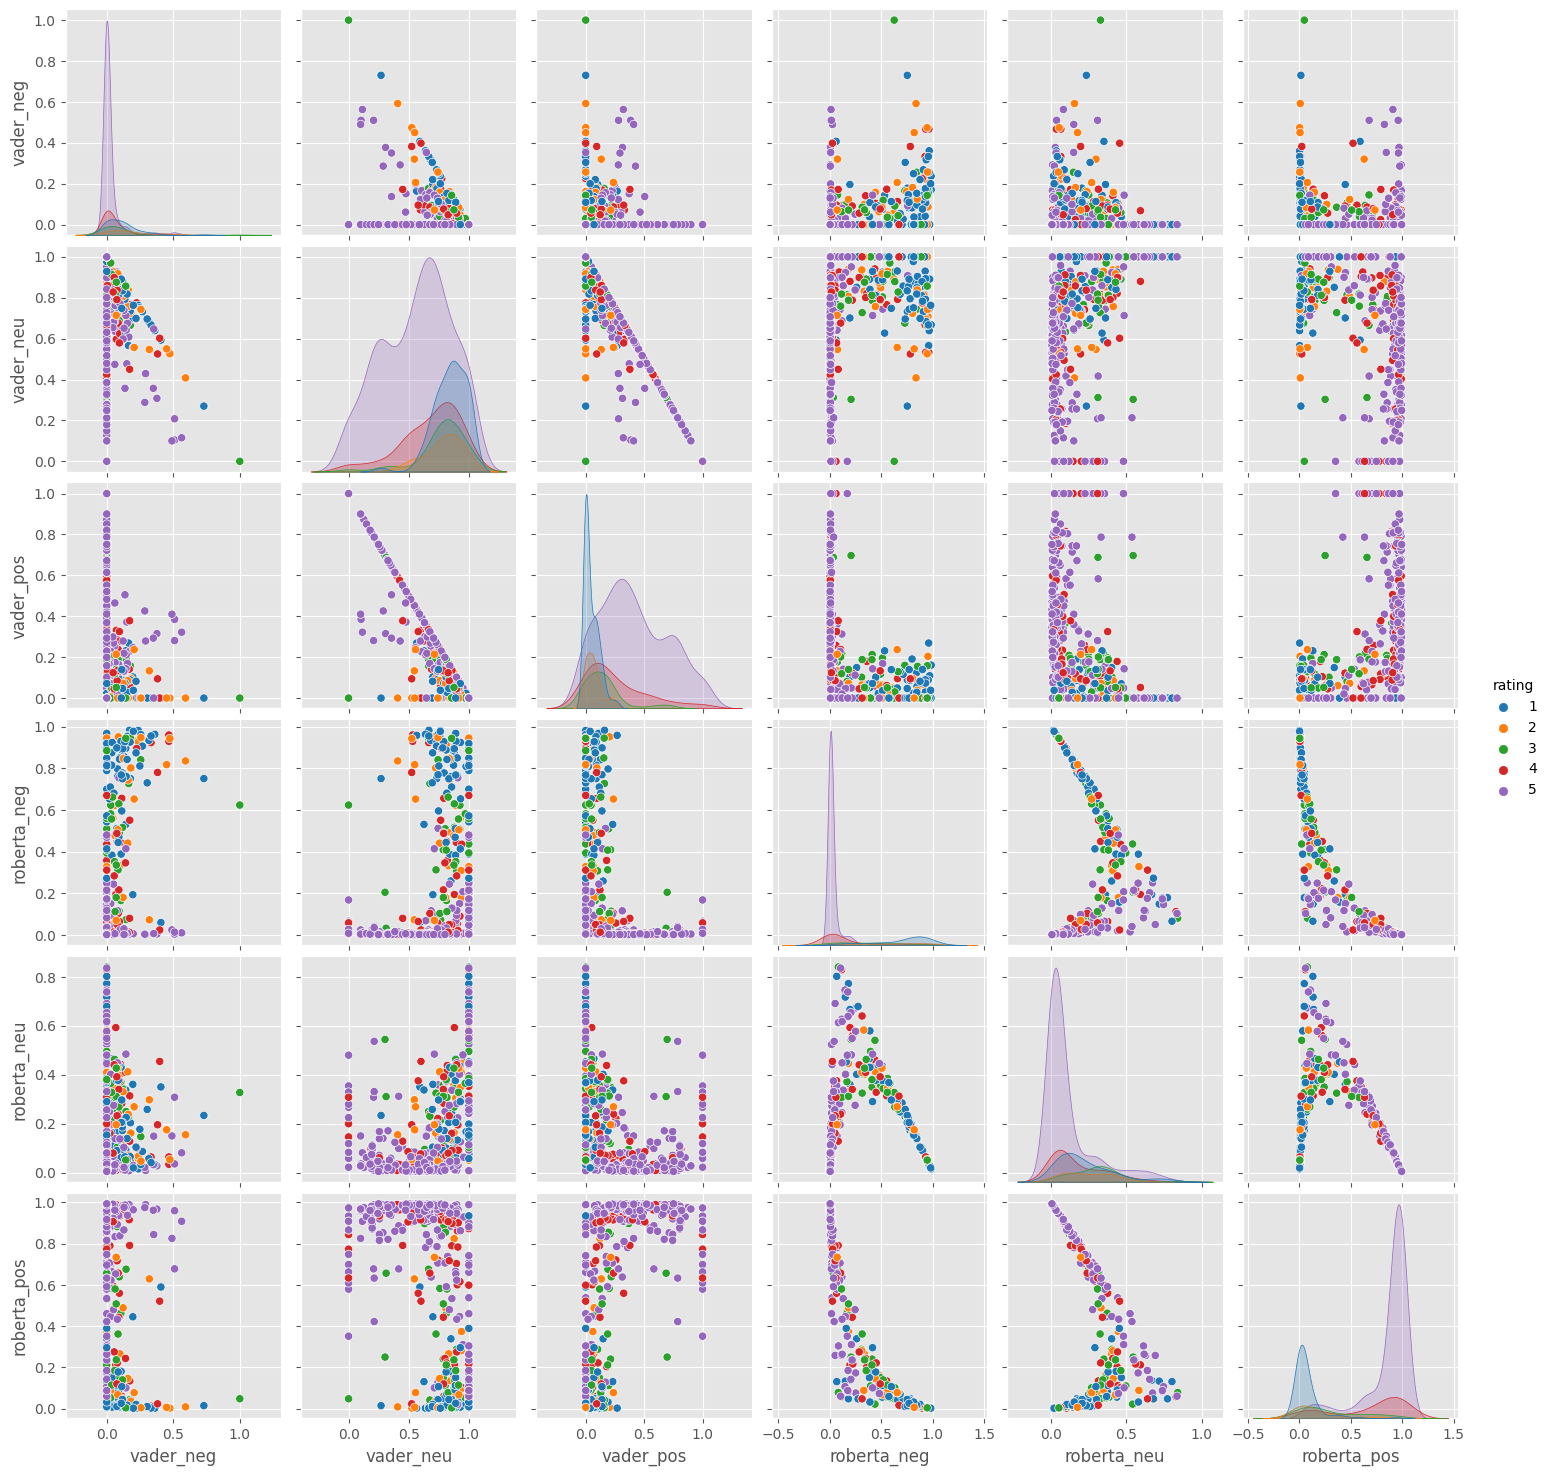

In [46]:
x=sns.pairplot(data=results_df1,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='rating',
            palette='tab10')
plt.show()

Analysis on BLU mobile reviews

In [47]:
df2.insert(0, 'id', range(1, len(df2) + 1))
df2.head()

,id,product_name,brand_name,price,rating,reviews,review_votes
103014,1,BLU Advance 4.0- Includes One Month Free Servi...,BLU,75.0,2,"I bought this phone in May, and it has complet...",0.0
103015,2,BLU Advance 4.0- Includes One Month Free Servi...,BLU,75.0,5,Excellent.,0.0
103016,3,BLU Advance 4.0- Includes One Month Free Servi...,BLU,75.0,5,Great phone,0.0
103017,4,BLU Advance 4.0- Includes One Month Free Servi...,BLU,75.0,5,"The screen is small, but works great. It is fa...",0.0
103018,5,BLU Advance 4.0- Includes One Month Free Servi...,BLU,75.0,2,i need to get rid of this phone...overheat pro...,0.0


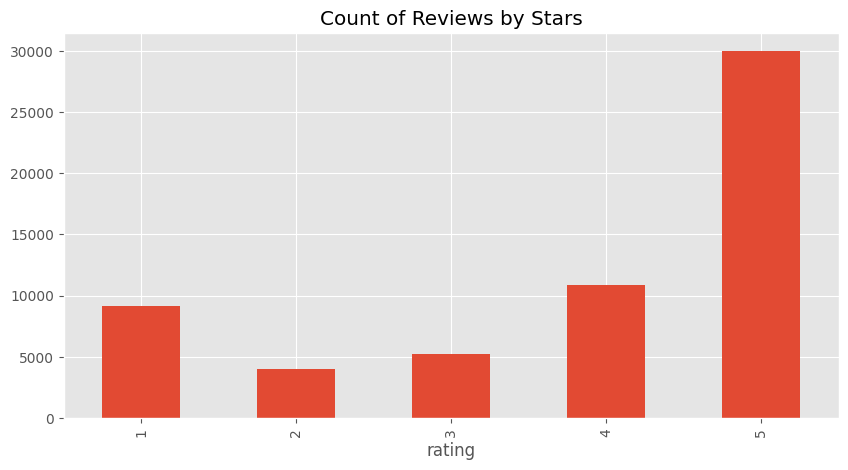

In [48]:
ax = df2['rating'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('rating')
plt.show()

In [49]:
df2.shape[0]

59168

In [50]:
df2 = df2.head(500)
print(df2.shape)

(500, 7)


In [51]:
example1 = df2.iloc[12]['reviews']
print(example1)

i need to get rid of this phone...overheat problem... not quite nice.. sorry... don't recommend this.


In [52]:
tokens = nltk.word_tokenize(example1)
tokens[:10]

['i', 'need', 'to', 'get', 'rid', 'of', 'this', 'phone', '...', 'overheat']

In [53]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('i', 'NNS'),
 ('need', 'VBP'),
 ('to', 'TO'),
 ('get', 'VB'),
 ('rid', 'JJ'),
 ('of', 'IN'),
 ('this', 'DT'),
 ('phone', 'NN'),
 ('...', ':'),
 ('overheat', 'NN')]

In [54]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  i/NNS
  need/VBP
  to/TO
  get/VB
  rid/JJ
  of/IN
  this/DT
  phone/NN
  .../:
  overheat/NN
  problem/NN
  .../:
  not/RB
  quite/RB
  nice../JJ
  sorry/NN
  .../:
  do/VBP
  n't/RB
  recommend/VB
  this/DT
  ./.)


In [55]:
sia.polarity_scores(example1)

{'neg': 0.131, 'neu': 0.869, 'pos': 0.0, 'compound': -0.2755}

In [56]:
res1 = {}
for i, row in tqdm(df2.iterrows(), total=len(df2)):
    text = row['reviews']
    myid = row['id']
    res1[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [57]:
vaders2 = pd.DataFrame(res1).T
vaders2 = vaders2.reset_index().rename(columns={'index': 'id'})
vaders2 = vaders2.merge(df2, how='left')

In [58]:
vaders2.to_csv('updated_dataset1.csv', index=False)

In [59]:
vaders2.head()

,id,neg,neu,pos,compound,product_name,brand_name,price,rating,reviews,review_votes
0,1,0.074,0.816,0.109,0.8708,BLU Advance 4.0- Includes One Month Free Servi...,BLU,75.0,2,"I bought this phone in May, and it has complet...",0.0
1,2,0.000,0.000,1.000,0.5719,BLU Advance 4.0- Includes One Month Free Servi...,BLU,75.0,5,Excellent.,0.0
2,3,0.000,0.196,0.804,0.6249,BLU Advance 4.0- Includes One Month Free Servi...,BLU,75.0,5,Great phone,0.0
3,4,0.000,0.827,0.173,0.7684,BLU Advance 4.0- Includes One Month Free Servi...,BLU,75.0,5,"The screen is small, but works great. It is fa...",0.0
4,5,0.131,0.869,0.000,-0.2755,BLU Advance 4.0- Includes One Month Free Servi...,BLU,75.0,2,i need to get rid of this phone...overheat pro...,0.0


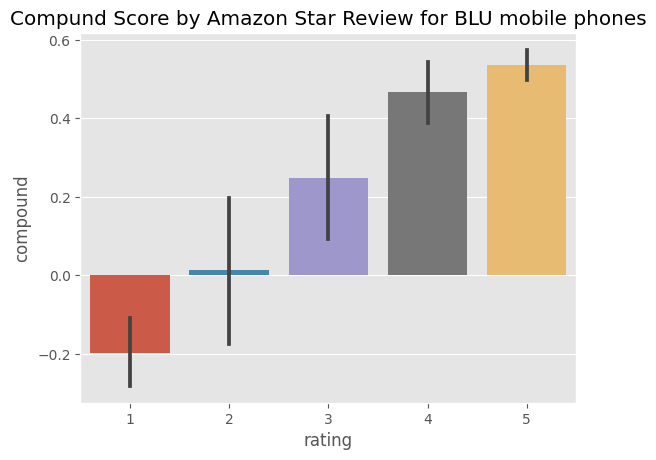

In [86]:
ax1 = sns.barplot(data=vaders2, x='rating', y='compound')
ax1.set_title('Compund Score by Amazon Star Review for BLU mobile phones')
plt.show()

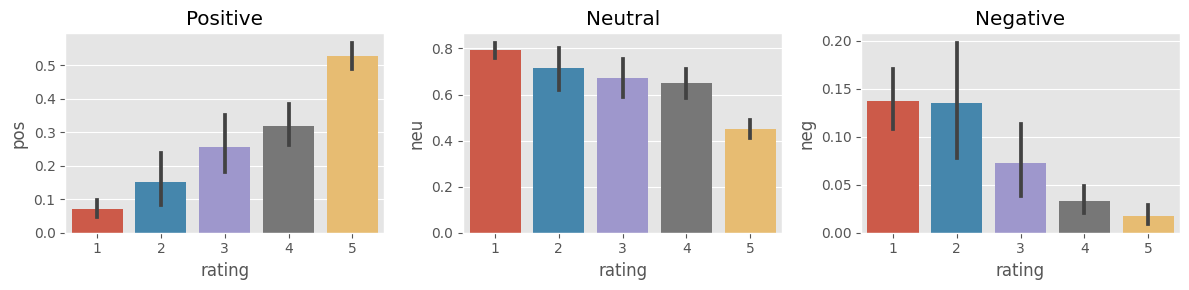

In [61]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders2, x='rating', y='pos', ax=axs[0])
sns.barplot(data=vaders2, x='rating', y='neu', ax=axs[1])
sns.barplot(data=vaders2, x='rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [62]:
encoded_text1 = tokenizer(example1, return_tensors='pt')
output = model(**encoded_text1)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict1 = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict1)

{'roberta_neg': 0.97107095, 'roberta_neu': 0.025040636, 'roberta_pos': 0.0038883586}


In [63]:
def polarity_scores_roberta(example1):
    encoded_text1 = tokenizer(example1, return_tensors='pt')
    output = model(**encoded_text1)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict1 = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict1

In [64]:
res1 = {}
for i, row in tqdm(df2.iterrows(), total=len(df2)):
    try:
        text = row['reviews']
        myid = row['id']
        vader_result2 = sia.polarity_scores(text)
        vader_result2_rename = {}
        for key, value in vader_result2.items():
            vader_result2_rename[f"vader_{key}"] = value
        roberta_result2 = polarity_scores_roberta(text)
        both = {**vader_result2_rename, **roberta_result2}
        res1[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/500 [00:00<?, ?it/s]

In [65]:
results_df2 = pd.DataFrame(res1).T
results_df2 = results_df2.reset_index().rename(columns={'index': 'id'})
results_df2 = results_df2.merge(df2, how='left')

In [66]:
results_df2.columns

Index(['id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'product_name',
       'brand_name', 'price', 'rating', 'reviews', 'review_votes'],
      dtype='object')

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


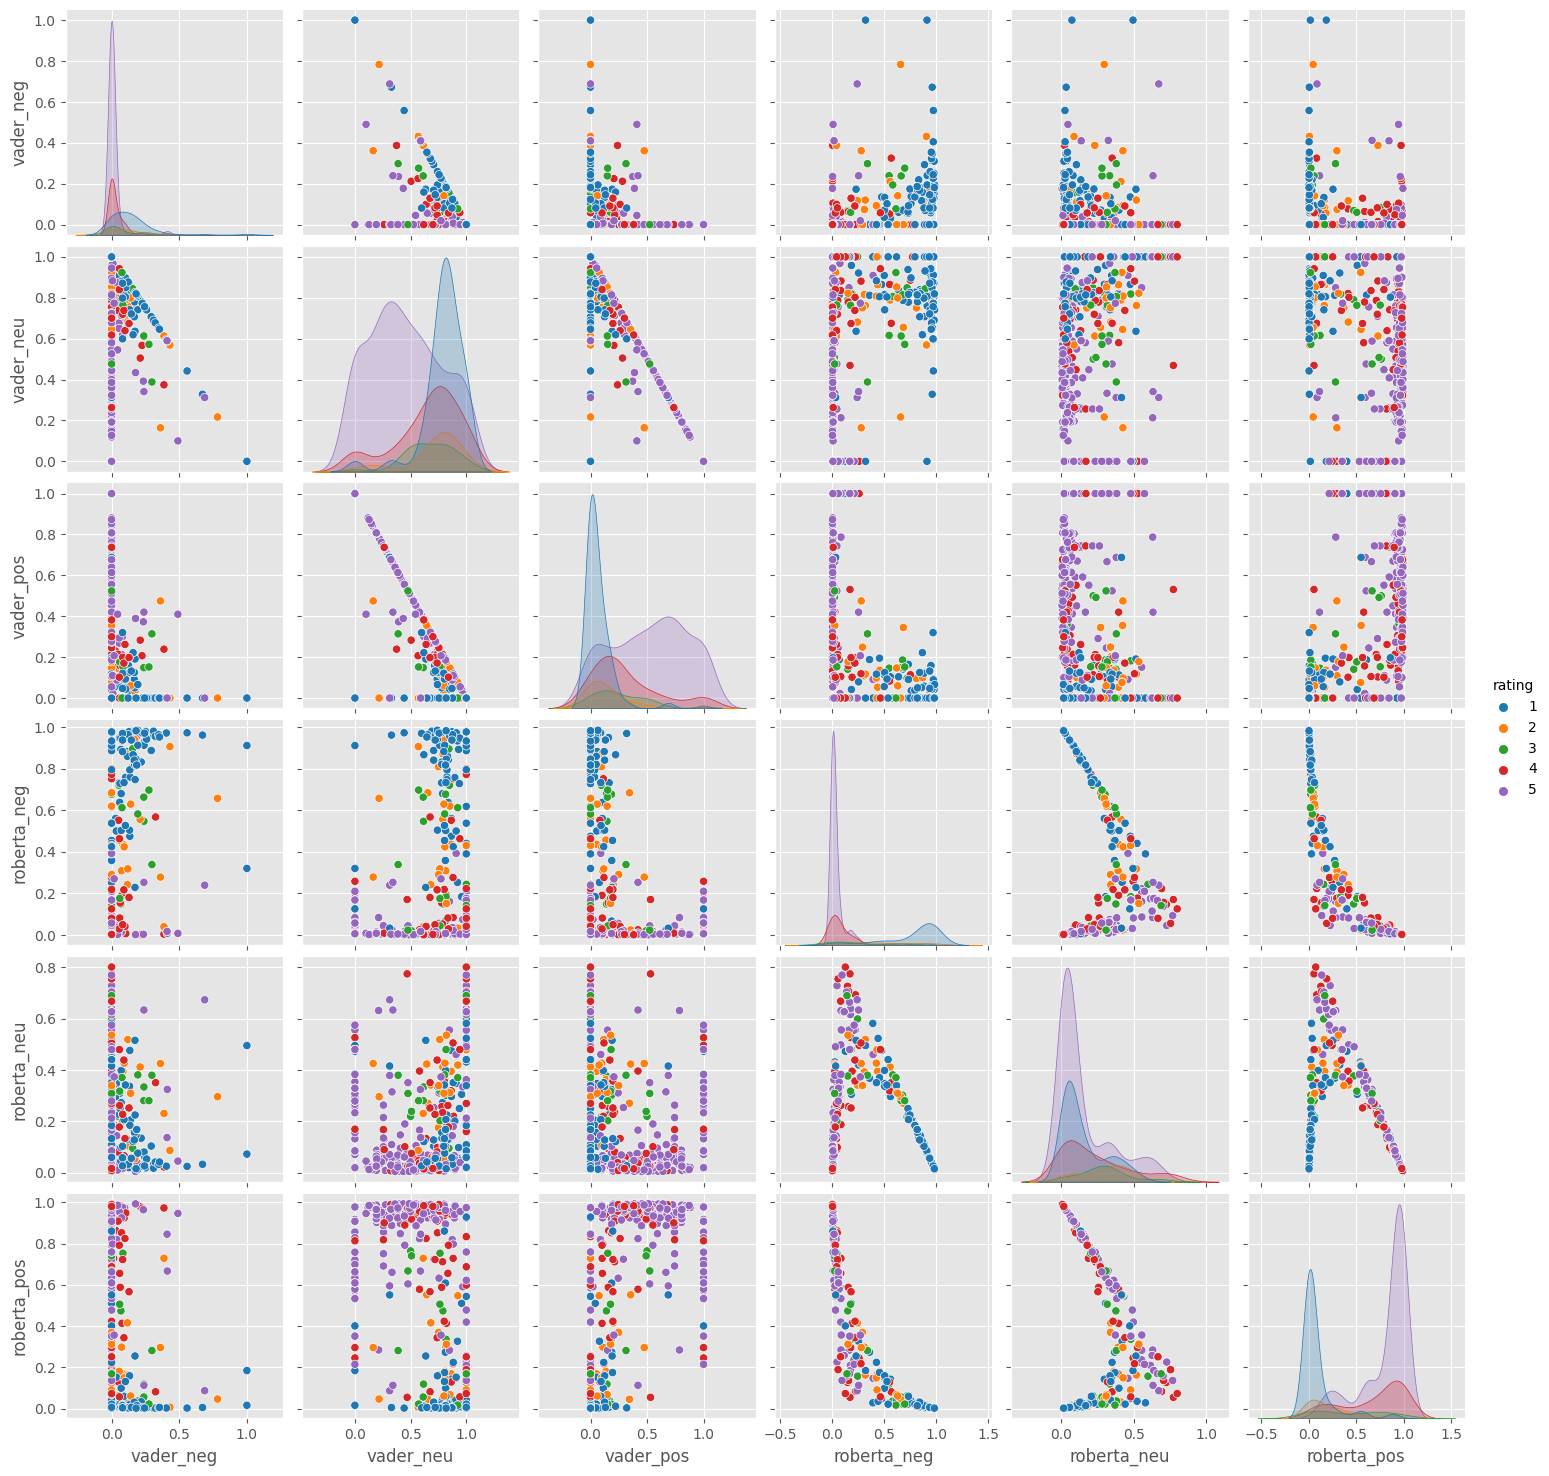

In [67]:
x=sns.pairplot(data=results_df2,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='rating',
            palette='tab10')
plt.show()

Analysis on Apple mobile reviews

In [68]:
df3.insert(0, 'id', range(1, len(df3) + 1))
df3.head()

,id,product_name,brand_name,price,rating,reviews,review_votes
3081,1,Apple - Iphone 5c A1532 Verizon 16 GB Cell Pho...,Apple,33.0,5,Was a gift for my husband and he loves it. Rep...,5.0
3082,2,Apple - Iphone 5c A1532 Verizon 16 GB Cell Pho...,Apple,33.0,5,"Great price, extremely fast shipping works as ...",1.0
3083,3,Apple - Iphone 5c A1532 Verizon 16 GB Cell Pho...,Apple,33.0,4,Moving from Android to Apple...my kids have th...,1.0
3084,4,Apple - Iphone 5c A1532 Verizon 16 GB Cell Pho...,Apple,33.0,4,It is compatible with Verizon. Not pink but PE...,0.0
3085,5,Apple - Iphone 5c A1532 Verizon 16 GB Cell Pho...,Apple,33.0,5,I love this phone! Thank you so much.,1.0


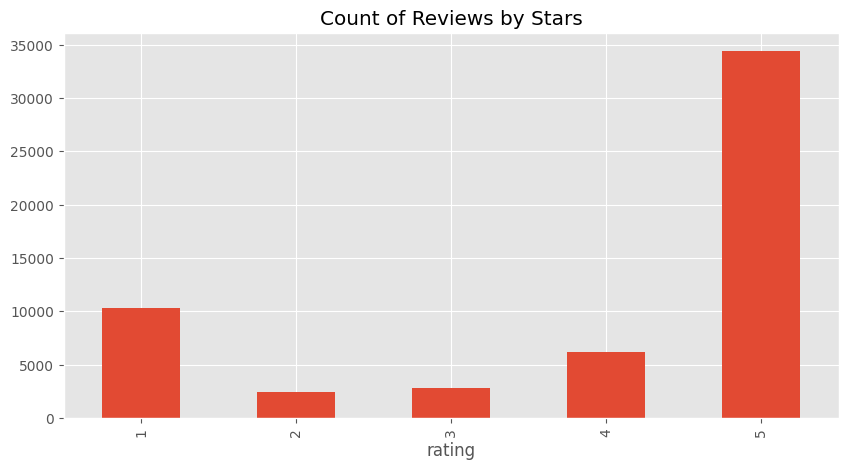

In [69]:
ax = df3['rating'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('rating')
plt.show()

In [70]:
df3.shape[0]
df3 = df3.head(500)
print(df3.shape)

(500, 7)


In [71]:
example2 = df3.iloc[20]['reviews']
print(example2)

After reviewing the phone and trying everything ywsteady to switch over to this phone it would not work. I ordered a new sim as well. Long story short, boh were a waste of my time and money and the phone did not come with a charger. The phone itself is in great condition, but was a waste for me.


In [72]:
tokens = nltk.word_tokenize(example2)
tokens[:10]

['After',
 'reviewing',
 'the',
 'phone',
 'and',
 'trying',
 'everything',
 'ywsteady',
 'to',
 'switch']

In [73]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('After', 'IN'),
 ('reviewing', 'VBG'),
 ('the', 'DT'),
 ('phone', 'NN'),
 ('and', 'CC'),
 ('trying', 'VBG'),
 ('everything', 'NN'),
 ('ywsteady', 'NN'),
 ('to', 'TO'),
 ('switch', 'VB')]

In [74]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  After/IN
  reviewing/VBG
  the/DT
  phone/NN
  and/CC
  trying/VBG
  everything/NN
  ywsteady/NN
  to/TO
  switch/VB
  over/IN
  to/TO
  this/DT
  phone/NN
  it/PRP
  would/MD
  not/RB
  work/VB
  ./.
  I/PRP
  ordered/VBD
  a/DT
  new/JJ
  sim/NN
  as/RB
  well/RB
  ./.
  (GPE Long/NNP)
  story/NN
  short/JJ
  ,/,
  boh/EX
  were/VBD
  a/DT
  waste/NN
  of/IN
  my/PRP$
  time/NN
  and/CC
  money/NN
  and/CC
  the/DT
  phone/NN
  did/VBD
  not/RB
  come/VBN
  with/IN
  a/DT
  charger/NN
  ./.
  The/DT
  phone/NN
  itself/PRP
  is/VBZ
  in/IN
  great/JJ
  condition/NN
  ,/,
  but/CC
  was/VBD
  a/DT
  waste/NN
  for/IN
  me/PRP
  ./.)


In [75]:
sia.polarity_scores(example2)

{'neg': 0.094, 'neu': 0.838, 'pos': 0.069, 'compound': -0.3612}

In [76]:
res2 = {}
for i, row in tqdm(df3.iterrows(), total=len(df3)):
    text = row['reviews']
    myid = row['id']
    res2[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [77]:
vaders3 = pd.DataFrame(res2).T
vaders3 = vaders3.reset_index().rename(columns={'index': 'id'})
vaders3 = vaders3.merge(df3, how='left')

In [78]:
vaders3.to_csv('updated_dataset2.csv', index=False)

In [79]:
vaders3.head()

,id,neg,neu,pos,compound,product_name,brand_name,price,rating,reviews,review_votes
0,1,0.159,0.765,0.076,-0.6836,Apple - Iphone 5c A1532 Verizon 16 GB Cell Pho...,Apple,33.0,5,Was a gift for my husband and he loves it. Rep...,5.0
1,2,0.000,0.614,0.386,0.6588,Apple - Iphone 5c A1532 Verizon 16 GB Cell Pho...,Apple,33.0,5,"Great price, extremely fast shipping works as ...",1.0
2,3,0.000,0.869,0.131,0.8074,Apple - Iphone 5c A1532 Verizon 16 GB Cell Pho...,Apple,33.0,4,Moving from Android to Apple...my kids have th...,1.0
3,4,0.124,0.593,0.283,0.8143,Apple - Iphone 5c A1532 Verizon 16 GB Cell Pho...,Apple,33.0,4,It is compatible with Verizon. Not pink but PE...,0.0
4,5,0.000,0.417,0.583,0.7901,Apple - Iphone 5c A1532 Verizon 16 GB Cell Pho...,Apple,33.0,5,I love this phone! Thank you so much.,1.0


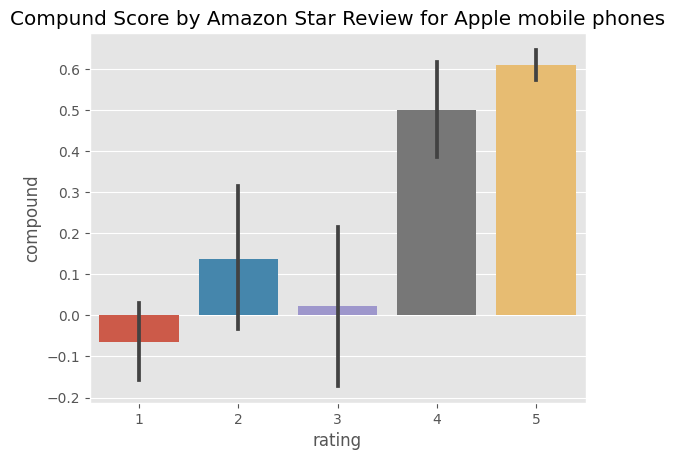

In [87]:
ax2 = sns.barplot(data=vaders3, x='rating', y='compound')
ax2.set_title('Compund Score by Amazon Star Review for Apple mobile phones')
plt.show()

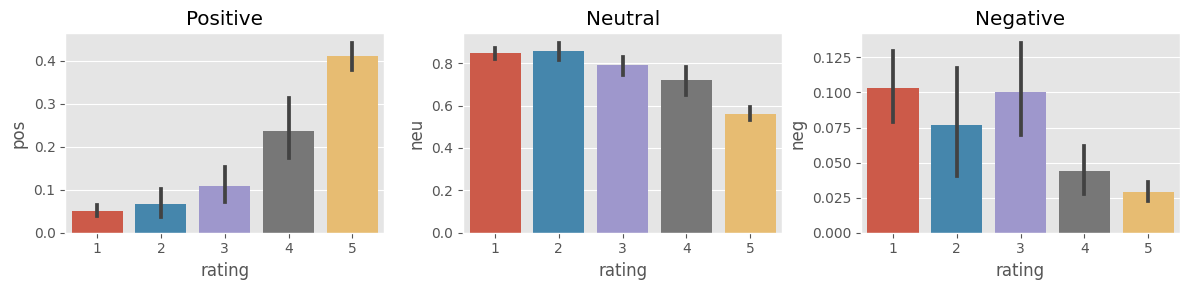

In [81]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders3, x='rating', y='pos', ax=axs[0])
sns.barplot(data=vaders3, x='rating', y='neu', ax=axs[1])
sns.barplot(data=vaders3, x='rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [82]:
encoded_text2 = tokenizer(example2, return_tensors='pt')
output = model(**encoded_text2)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict2 = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict2)

{'roberta_neg': 0.8859144, 'roberta_neu': 0.0972901, 'roberta_pos': 0.016795615}


In [83]:
def polarity_scores_roberta(example2):
    encoded_text2 = tokenizer(example2, return_tensors='pt')
    output = model(**encoded_text2)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict2 = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict2

In [84]:
res2 = {}
for i, row in tqdm(df3.iterrows(), total=len(df3)):
    try:
        text = row['reviews']
        myid = row['id']
        vader_result3 = sia.polarity_scores(text)
        vader_result3_rename = {}
        for key, value in vader_result3.items():
            vader_result3_rename[f"vader_{key}"] = value
        roberta_result3 = polarity_scores_roberta(text)
        both = {**vader_result3_rename, **roberta_result3}
        res2[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/500 [00:00<?, ?it/s]

In [88]:
results_df3 = pd.DataFrame(res2).T
results_df3 = results_df3.reset_index().rename(columns={'index': 'id'})
results_df3 = results_df3.merge(df3, how='left')

In [89]:
results_df3.columns

Index(['id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'product_name',
       'brand_name', 'price', 'rating', 'reviews', 'review_votes'],
      dtype='object')

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


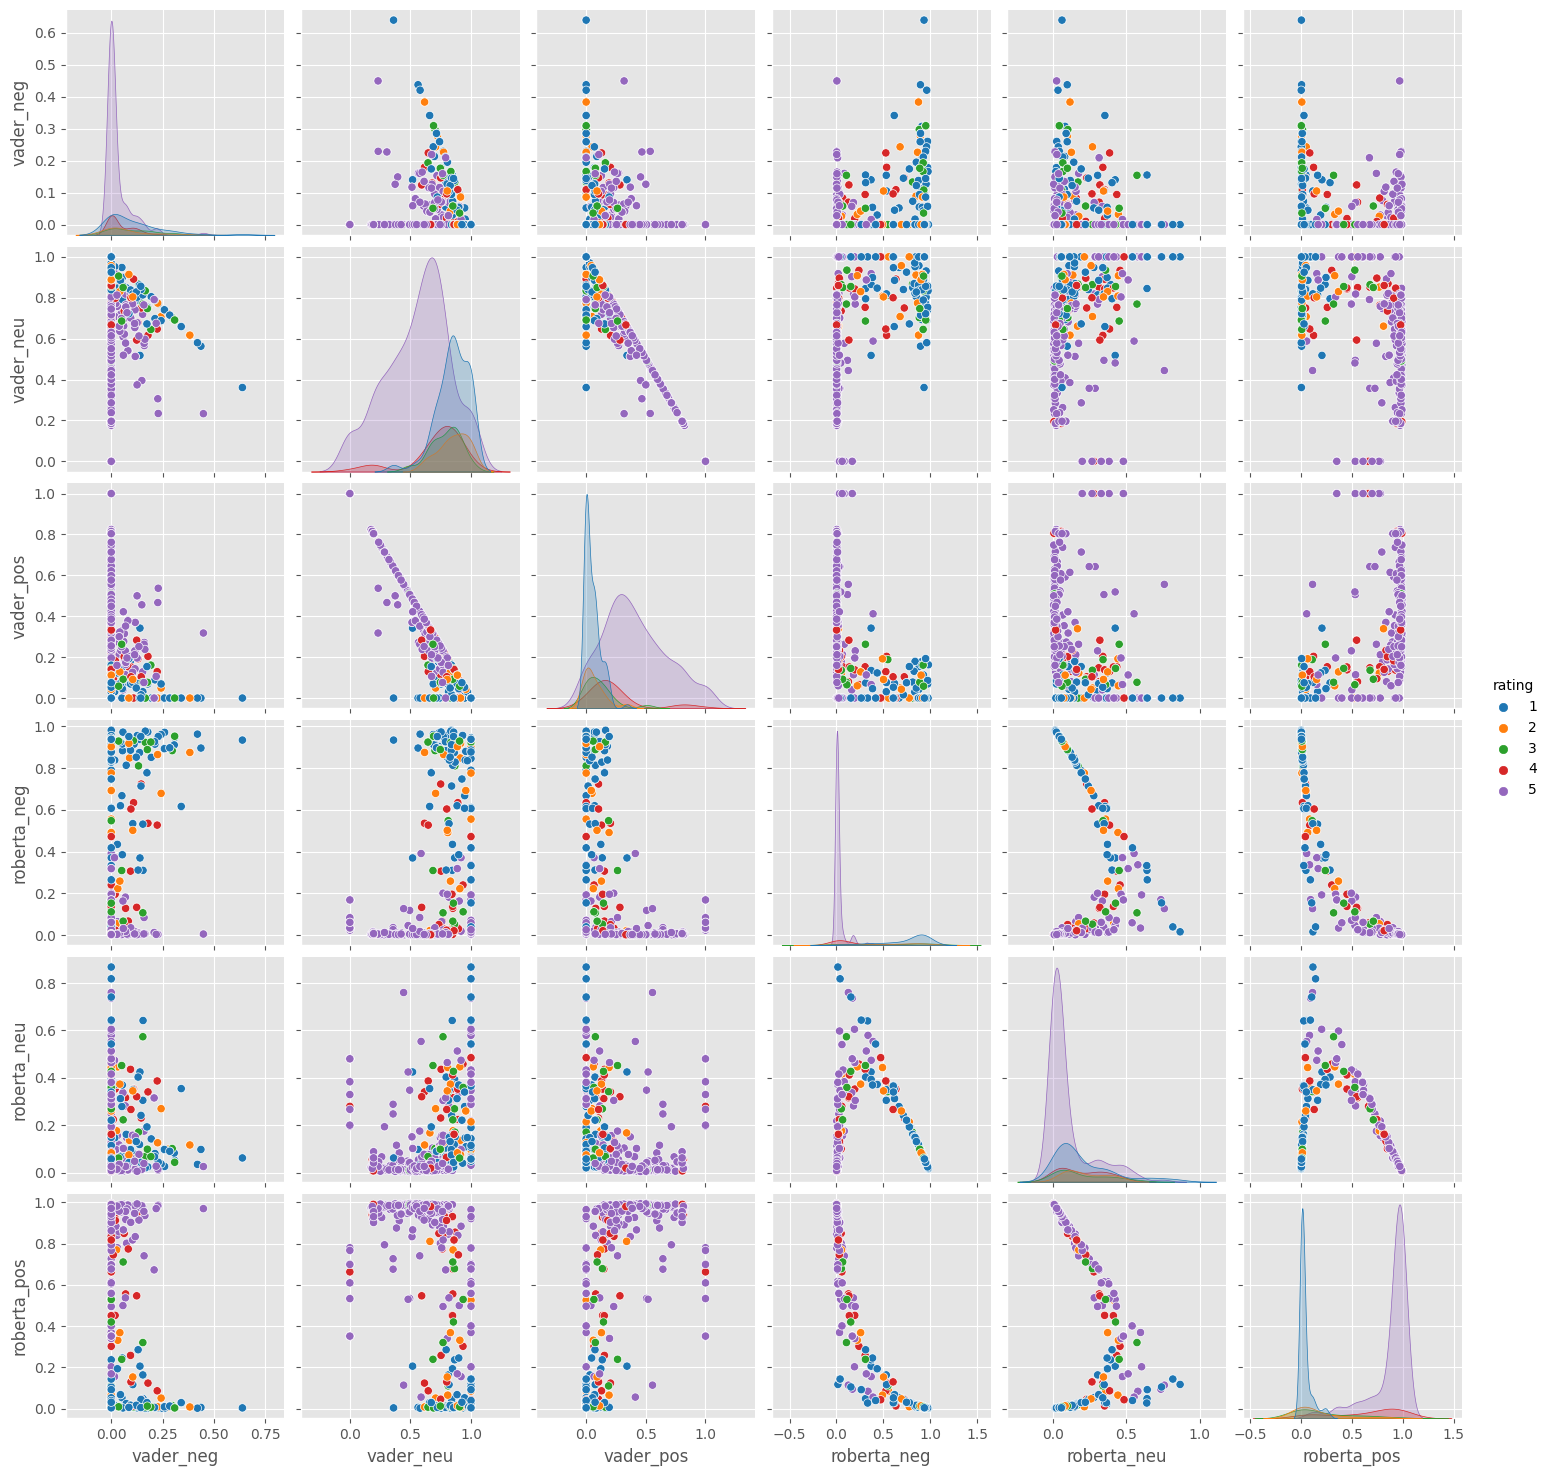

In [90]:
x=sns.pairplot(data=results_df3,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='rating',
            palette='tab10')
plt.show()

Comparison of all 3 mobile reviews

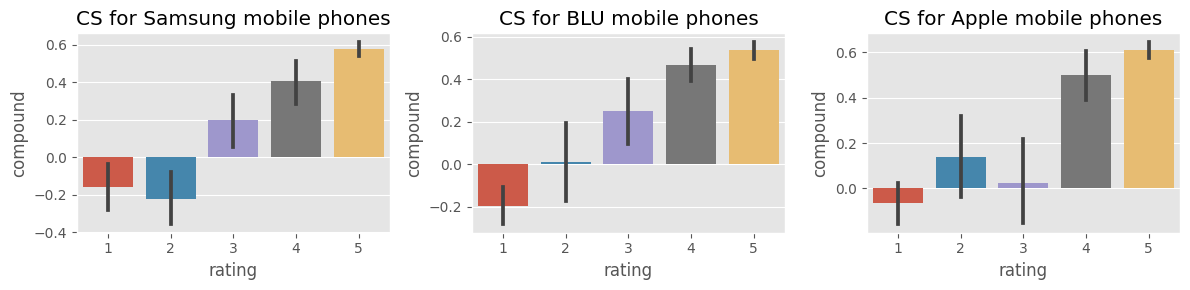

In [94]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders1, x='rating', y='compound', ax=axs[0])
sns.barplot(data=vaders2, x='rating', y='compound', ax=axs[1])
sns.barplot(data=vaders3, x='rating', y='compound', ax=axs[2])
axs[0].set_title('CS for Samsung mobile phones')
axs[1].set_title('CS for BLU mobile phones')
axs[2].set_title('CS for Apple mobile phones')
plt.tight_layout()
plt.show()

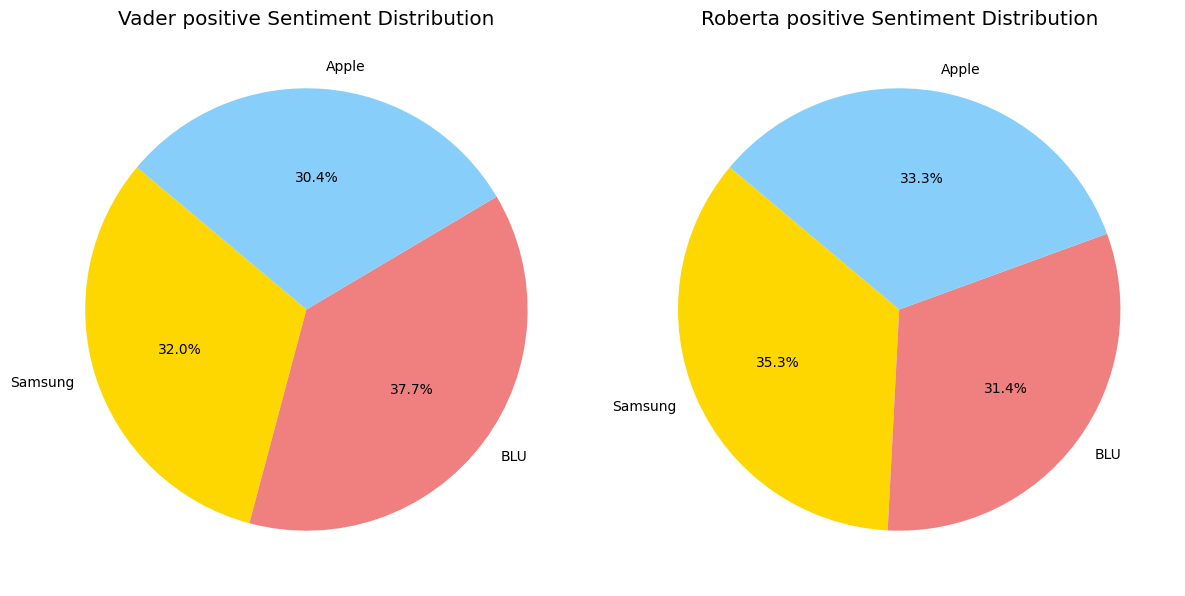

In [108]:
import matplotlib.pyplot as plt

# Your dataframes vaders1, vaders2, and vaders3 should already be defined.

# Calculate the sum of 'pos' for each dataframe
total_pos1 = vaders1['pos'].sum()
total_pos11 = results_df1['roberta_pos'].sum()
total_pos2 = vaders2['pos'].sum()
total_pos22 = results_df2['roberta_pos'].sum()
total_pos3 = vaders3['pos'].sum()
total_pos33 = results_df3['roberta_pos'].sum()

# Create data for the pie chart
posvader_counts = [total_pos1, total_pos2, total_pos3]
posroberta_counts = [total_pos11, total_pos22, total_pos33]
labels = ['Samsung', 'BLU', 'Apple']
colors = ['gold', 'lightcoral', 'lightskyblue']
explode = (0, 0, 0)  # Explode the first slice (Samsung)

plt.figure(figsize=(18, 6))

plt.subplot(131)
plt.pie(posvader_counts, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=140)
plt.title('Vader positive Sentiment Distribution')

plt.subplot(132)
plt.pie(posroberta_counts, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=140)
plt.title('Roberta positive Sentiment Distribution')

plt.tight_layout()

plt.show()


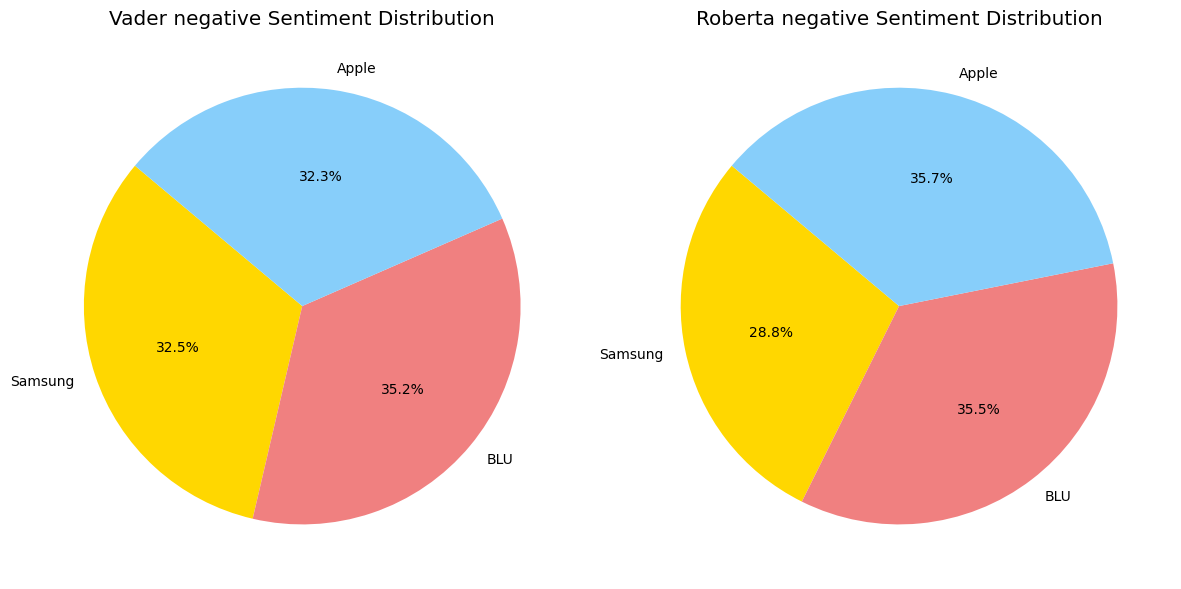

In [110]:
import matplotlib.pyplot as plt

# Your dataframes vaders1, vaders2, and vaders3 should already be defined.

# Calculate the sum of 'pos' for each dataframe
total_pos1 = vaders1['neg'].sum()
total_pos11 = results_df1['roberta_neg'].sum()
total_pos2 = vaders2['neg'].sum()
total_pos22 = results_df2['roberta_neg'].sum()
total_pos3 = vaders3['neg'].sum()
total_pos33 = results_df3['roberta_neg'].sum()

# Create data for the pie chart
posvader_counts = [total_pos1, total_pos2, total_pos3]
posroberta_counts = [total_pos11, total_pos22, total_pos33]
labels = ['Samsung', 'BLU', 'Apple']
colors = ['gold', 'lightcoral', 'lightskyblue']
explode = (0, 0, 0)  # Explode the first slice (Samsung)

plt.figure(figsize=(18, 6))

plt.subplot(131)
plt.pie(posvader_counts, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=140)
plt.title('Vader negative Sentiment Distribution')

plt.subplot(132)
plt.pie(posroberta_counts, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=140)
plt.title('Roberta negative Sentiment Distribution')

plt.tight_layout()

plt.show()

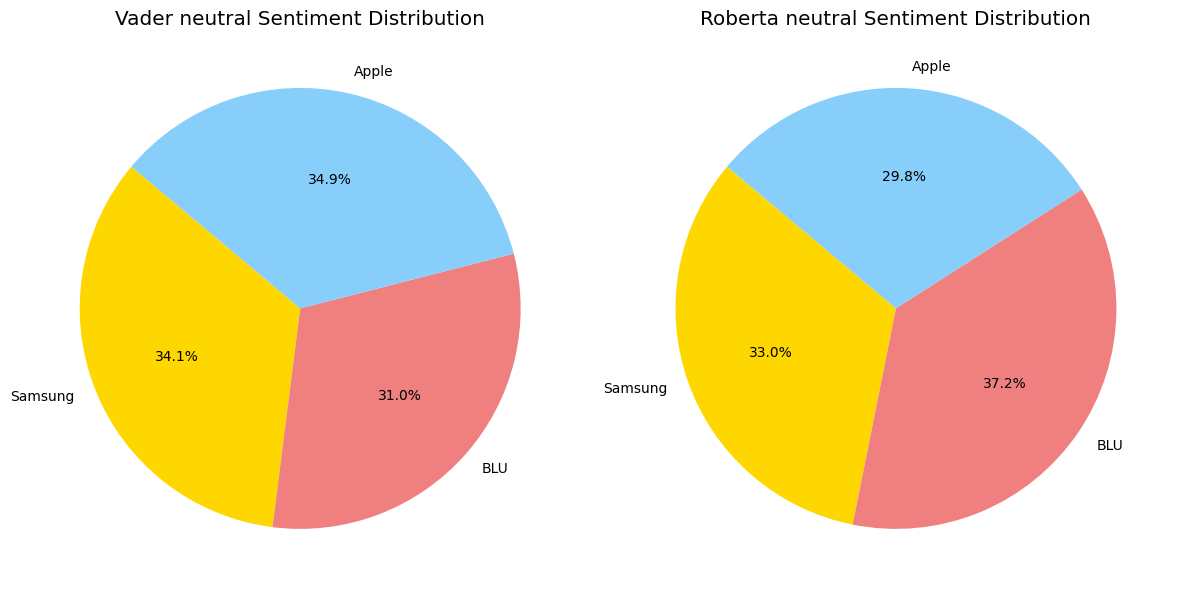

In [111]:
import matplotlib.pyplot as plt

total_pos1 = vaders1['neu'].sum()
total_pos11 = results_df1['roberta_neu'].sum()
total_pos2 = vaders2['neu'].sum()
total_pos22 = results_df2['roberta_neu'].sum()
total_pos3 = vaders3['neu'].sum()
total_pos33 = results_df3['roberta_neu'].sum()

posvader_counts = [total_pos1, total_pos2, total_pos3]
posroberta_counts = [total_pos11, total_pos22, total_pos33]
labels = ['Samsung', 'BLU', 'Apple']
colors = ['gold', 'lightcoral', 'lightskyblue']
explode = (0, 0, 0)  

plt.figure(figsize=(18, 6))

plt.subplot(131)
plt.pie(posvader_counts, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=140)
plt.title('Vader neutral Sentiment Distribution')

plt.subplot(132)
plt.pie(posroberta_counts, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=140)
plt.title('Roberta neutral Sentiment Distribution')

plt.tight_layout()

plt.show()